In [160]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [161]:
df = pd.read_csv("netflix.txt")
df.shape

(8807, 12)

### number of rows in data : 8,807 and number of columns is: 12
###  Lets explore which are the columns and their data types.
###  Release_year appear as interger data types, rest are object. We will need to convert date_added to datetime format to  further work on it

In [162]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [163]:
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

### lets explore missing values in the data. Though column director has 30% of data missing but we will not do any imputation for the missing values as that will create false impression of the data understanding. Also, thing to note is 'cast' and 'country' has ~9% of missing data

In [164]:
df.isnull().sum()/len(df)

show_id         0.000000
type            0.000000
title           0.000000
director        0.299080
cast            0.093675
country         0.094357
date_added      0.001135
release_year    0.000000
rating          0.000454
duration        0.000341
listed_in       0.000000
description     0.000000
dtype: float64

### we wanted to check the distribution of individual data. Only 'release_year' appears as integer data- the min year shows 1925 and maximum release year is 2021. But there are very few values spanning around 1925 and 25% of data is 2013. So, we mostly have data from 2013 to 2021. 
### The object datatype shows frequent occurence of values in a given column. But data appears to be in listed format, so we need to be careful while concluding on frequent values.

In [165]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


### Lets see if there is any duplicate entries in the data. Since the shape of data is matching with length of data we got after drop_duplicates, we can conclude that there are no duplicate entries in the data

In [166]:
len(df.drop_duplicates())== df.shape[0]

True

In [167]:
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


In [168]:
df.iloc[1]

show_id                                                        s2
type                                                      TV Show
title                                               Blood & Water
director                                                      NaN
cast            Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...
country                                              South Africa
date_added                                     September 24, 2021
release_year                                                 2021
rating                                                      TV-MA
duration                                                2 Seasons
listed_in         International TV Shows, TV Dramas, TV Mysteries
description     After crossing paths at a party, a Cape Town t...
Name: 1, dtype: object

### we can see that there are few columns which appear as nested list. Getting counts of nested list to get maximum count won't be representative information if we are interested in individuals.

# lets do "Univariate" exploration of data which doesn't exist as nested list:

In [169]:
colsList = ['show_id', 'type', 'title', 'date_added','release_year', 'rating', 'duration', 'description']

Number of unique values in column 'show_id': 8807
s3191    1
s2772    1
s6245    1
s2706    1
s4466    1
Name: show_id, dtype: int64


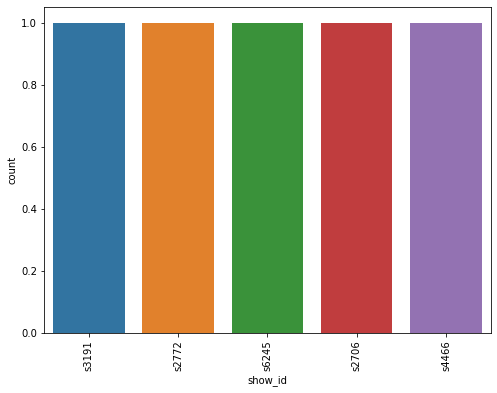

################################
Number of unique values in column 'type': 2
Movie      6131
TV Show    2676
Name: type, dtype: int64


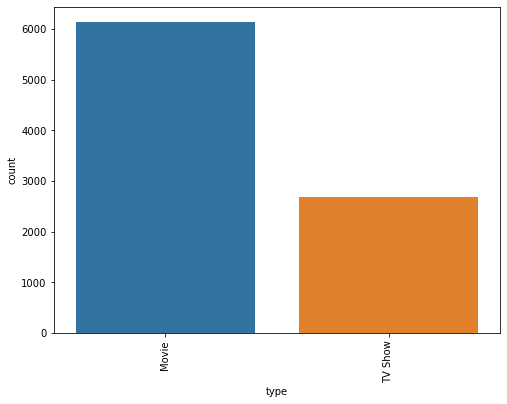

################################
Number of unique values in column 'title': 8807
Immoral Tales                                          1
Big Time                                               1
The Pharmacist                                         1
Jimmy Carr: The Best of Ultimate Gold Greatest Hits    1
Cold Feet                                              1
Name: title, dtype: int64


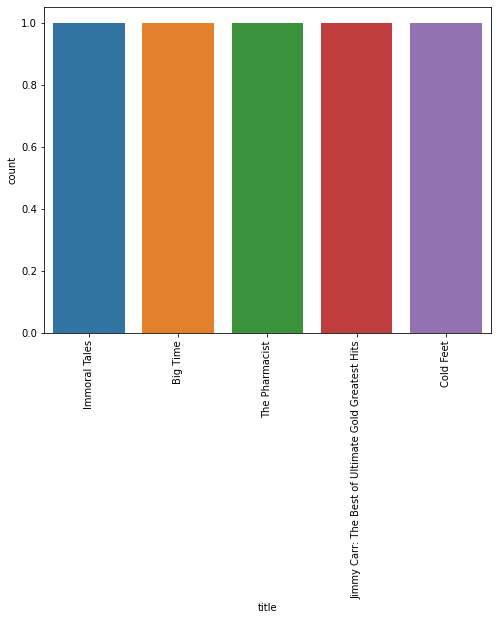

################################
Number of unique values in column 'date_added': 1767
January 1, 2020      109
November 1, 2019      89
March 1, 2018         75
December 31, 2019     74
October 1, 2018       71
Name: date_added, dtype: int64


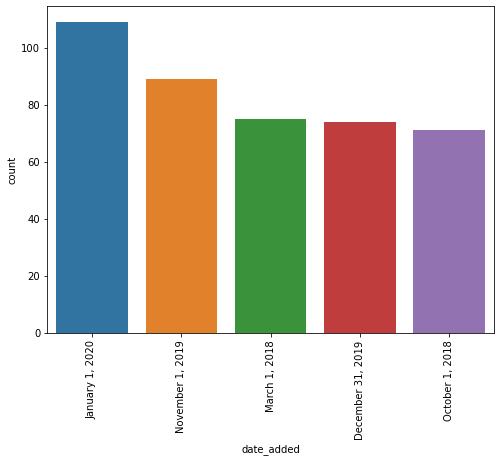

################################
Number of unique values in column 'release_year': 74
2018    1147
2017    1032
2019    1030
2020     953
2016     902
Name: release_year, dtype: int64


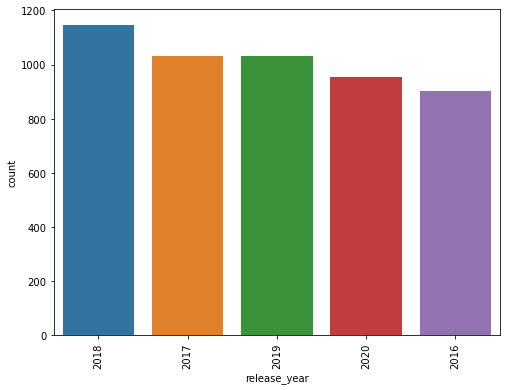

################################
Number of unique values in column 'rating': 18
TV-MA    3207
TV-14    2160
TV-PG     862
R         799
PG-13     490
Name: rating, dtype: int64


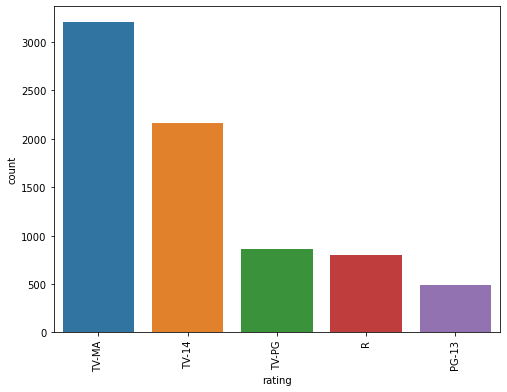

################################
Number of unique values in column 'duration': 220
1 Season     1793
2 Seasons     425
3 Seasons     199
90 min        152
94 min        146
Name: duration, dtype: int64


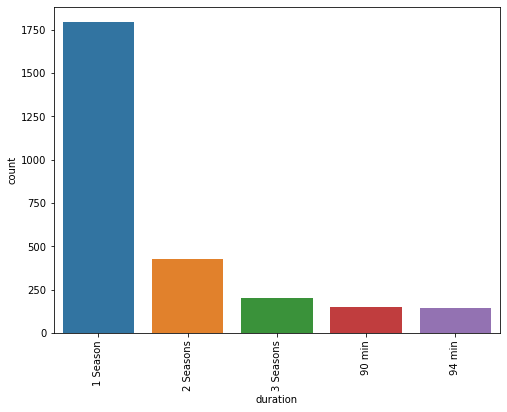

################################
Number of unique values in column 'description': 8775
Paranormal activity at a lush, abandoned property alarms a group eager to redevelop the site, but the eerie events may not be as unearthly as they think.    4
A surly septuagenarian gets another chance at her 20s after having her photo snapped at a studio that magically takes 50 years off her life.                 3
Multiple women report their husbands as missing but when it appears they are looking for the same man, a police officer traces their cryptic connection.     3
Challenged to compose 100 songs before he can marry the girl he loves, a tortured but passionate singer-songwriter embarks on a poignant musical journey.    3
An aspiring musician battles age-old caste divides to be able to learn the art of a classical instrument from a traditionalist, veteran percussionist.       2
Name: description, dtype: int64


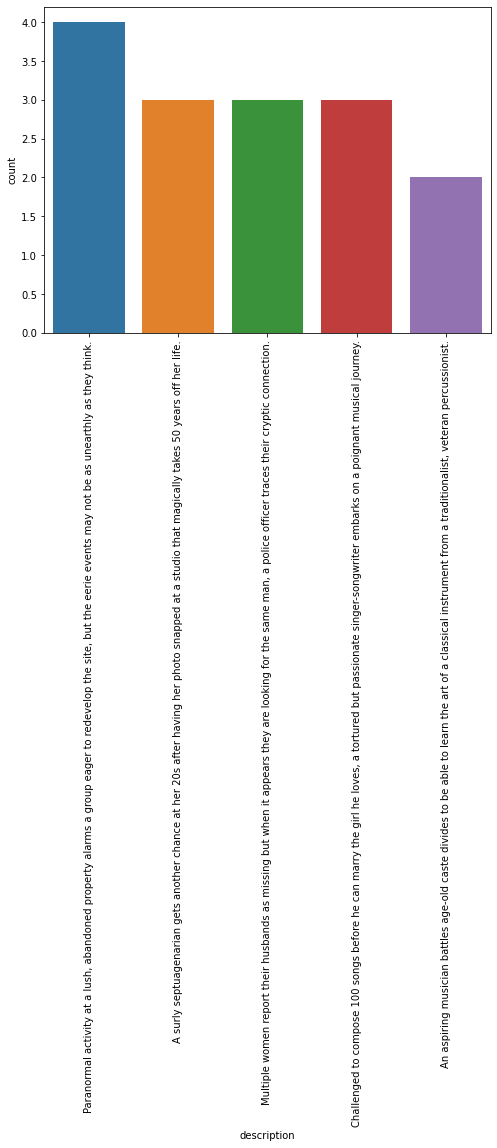

################################


In [172]:

for col in colsList:
    print(f"Number of unique values in column '{col}':", df[col].nunique())
    print((df[col].value_counts()).head(5))
    plt.figure(figsize = (8,6))
    sns.countplot(x = col ,data =df, order = df[col].value_counts().nlargest(n=5).index)
    plt.xticks(rotation=90)
    plt.show()
    print("################################")

**Data understanding:**

1. There are unique entries of show_id and there are no  duplicate entries in the data. There are information of 8,807 unique shows available on Netflix
   
   
2. There are 2 types of shows running on Netflix: 
    * Movie
    * TV Shows
   where 'Movies' appear 69% in data and 'TV Show' appear 30% in the data. 
   
   
3. 'Title' of the shows appear to be unique across data. No two shows share same Title.


4. If we sort the 'Director' column, 'Rajiv Chilaka' has directed maximum number of shows (19), followed by 'Raúl Campos,Jan Suter'(18). 


5. 'David Attenborough' appear in maximum number of shows(19/8,807).


6. Maximum number of shows are produced in 'United States'(32%) followed by India(11%) and United Kingdom(4.7%).


7. 109/8,807 shows are added on 1st January 2020. We can analyse this data for year-on-year growth of  
   Netflix.
   
   
8. Maximum number of shows being featured on Netflix are from year 2018(13%) followed by similar numbers for 2017(~12%) and 2019(~12%).


9. Rating column indicates maturity rating for the shows. TV-MA rating is most common for shows and appear in 36% of data, followed by TV-14 (24%) and TV-PG (10%).


10. Most of the shows appear in the data have duration of '1-season' (20%) followed by '2-seasons' which appear in 5% of data.


11. Top 3 categories showing genre of the shows: 
    * Dramas, International Movies  
    * Documentaries
    * Stand-Up Comedy 
    
    
12. There are occurences of same description across data. Like a given description appears 4 times. Upon checking further, these belong to 4 different shows which differs by language in which same show is produced.

## lets understand the nested data. There are two columns ('cast','listed_in', 'director', 'country') where data appears as nested values.The implication is when we try to find out which actor/actress appear maximum number of times.  
## We will never be able to pin-point exactly who is the actor/actress who got maximum number of movies listed as it will appear as grouped data. 
## Similarly, for listed_in column, a given show can appear in multiple geners. So, If we want to ask which is most frequent genres of movie appear on netflix, we will not be able to answer this based on grouped data. We need to segregate the data. (director, cast, country, listed_in)

In [173]:
def unlist_df(df,col,iden):
    temp = pd.DataFrame(df[col].apply(lambda x: str(x).split(', ')))
    temp[iden] = df[iden]
    temp = temp.explode(col)
    temp.reset_index(drop=True,inplace=True)
    return pd.DataFrame(temp)  

In [174]:
temp_cast = unlist_df(df,'cast','show_id')
temp_listedin = unlist_df(df,'listed_in','show_id')
temp_director = unlist_df(df,'director','show_id')
temp_country = unlist_df(df,'country','show_id')


In [175]:
df1 = pd.merge(df,temp_cast, how='inner', on = 'show_id')
df2 = pd.merge(df1,temp_listedin, how='inner', on = 'show_id')
df3 = pd.merge(df2,temp_director, how='inner', on = 'show_id')
dfM = pd.merge(df3,temp_country, how='inner', on = 'show_id')

dfM.reset_index(drop=True, inplace=True)

dfM.rename(columns={'cast_x':'cast_list', 'listed_in_x': 'listed_in_list', 'director_x':'director_list',
                    'country_x':'country_list', 'cast_y':'cast','listed_in_y':'listed_in', 'director_y':'director',
                   'country_y':'country'},inplace=True)

In [176]:
dfM.shape

(201991, 16)

In [177]:
dfM.head(2)

,show_id,type,title,director_list,cast_list,country_list,date_added,release_year,rating,duration,listed_in_list,description,cast,listed_in,director,country
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",nan,Documentaries,Kirsten Johnson,United States
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Ama Qamata,International TV Shows,nan,South Africa


### dfM is new dataframe where we got nested list in each of 4 columns unlisted (director, cast, country, listed_in) 
### In order to get counts for maximum values,we prepare separate dataframes using get_count function.

In [178]:
def get_count(df,col):
    temp=df.groupby(df[col],as_index=False)['show_id'].nunique()
    temp.sort_values(by='show_id',ascending=False,inplace=True)    
    temp.rename(columns = {'show_id':'count'},inplace=True)
    temp[col].replace({'nan':np.nan},inplace=True)
    temp.dropna(axis=0,inplace=True)
    temp['perc'] = round((temp['count']/8807)*100,2)
    temp.reset_index(drop=True,inplace=True)
    return temp

In [179]:
tdirector = get_count(dfM,'director')
tcast = get_count(dfM,'cast')
tlisted_in = get_count(dfM, 'listed_in')
tcountry = get_count(dfM, 'country')

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Rajiv Chilaka'),
  Text(1, 0, 'Jan Suter'),
  Text(2, 0, 'Raúl Campos'),
  Text(3, 0, 'Suhas Kadav'),
  Text(4, 0, 'Marcus Raboy'),
  Text(5, 0, 'Jay Karas')])

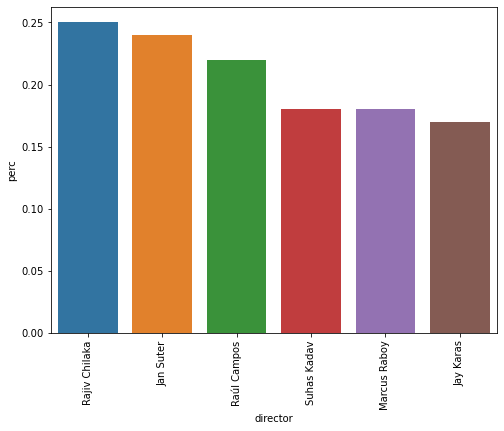

In [180]:
plt.figure(figsize = (8,6))
sns.barplot(x = 'director',y= 'perc', data =tdirector.iloc[0:6,])
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Anupam Kher'),
  Text(1, 0, 'Shah Rukh Khan'),
  Text(2, 0, 'Julie Tejwani'),
  Text(3, 0, 'Naseeruddin Shah'),
  Text(4, 0, 'Takahiro Sakurai'),
  Text(5, 0, 'Rupa Bhimani')])

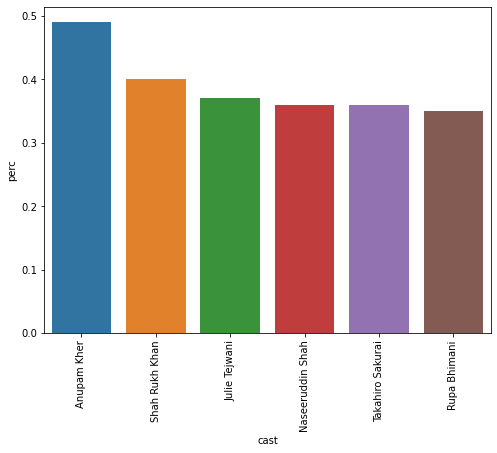

In [181]:
plt.figure(figsize = (8,6))
sns.barplot(x = 'cast',y= 'perc', data =tcast.iloc[0:6,])
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'International Movies'),
  Text(1, 0, 'Dramas'),
  Text(2, 0, 'Comedies'),
  Text(3, 0, 'International TV Shows'),
  Text(4, 0, 'Documentaries'),
  Text(5, 0, 'Action & Adventure')])

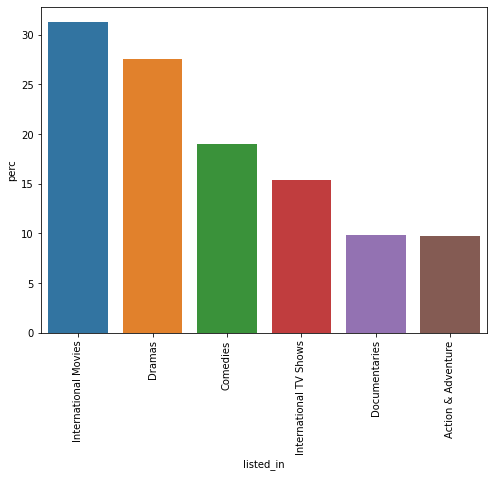

In [182]:
plt.figure(figsize = (8,6))
sns.barplot(x = 'listed_in',y= 'perc', data =tlisted_in.iloc[0:6,])
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'United States'),
  Text(1, 0, 'India'),
  Text(2, 0, 'United Kingdom'),
  Text(3, 0, 'Canada'),
  Text(4, 0, 'France'),
  Text(5, 0, 'Japan')])

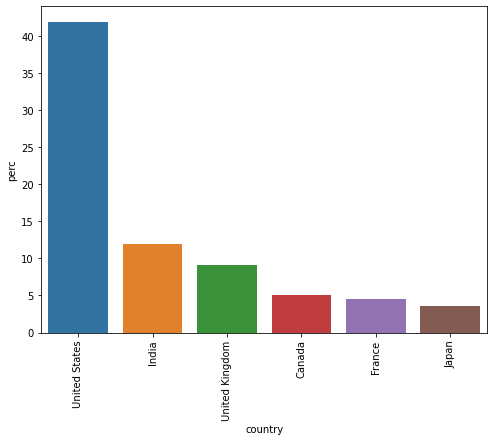

In [183]:
plt.figure(figsize = (8,6))
sns.barplot(x = 'country',y= 'perc', data =tcountry.iloc[0:6,])
plt.xticks(rotation=90)

### conclusions from above charts :
### country - maximum number of shows are produced in United States (40%) and India followed by UK and Canada
### listed_in - maximum shows are listed in "International Movies" (30%) categories followed by Dramas(28%)
### cast - maximum number of shows listed in Netflix data has "Anupam kher" (~5%) followed by ShahRukh Khan (~4%)
### director - Rajiv Chilaka appears maximum (~0.25%) of time followed by Jan Suter (~0.20%).

### Bivariate analysis ###########

### given type=Movie/TV Shows -> who is famous director, famous cast, country, rating,duration, listed_in

### what kind of director-cast/ director-cast-country combo people want to see more

### what kind of director's work (listed_in) people like more

### what kind of show being produced mostly in United States, India

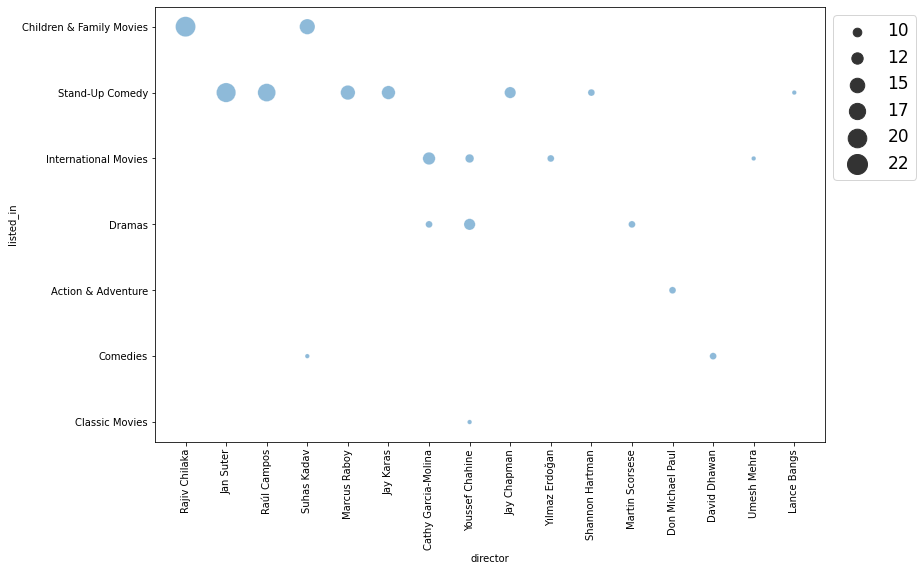

In [184]:
a =dfM.groupby(['director','listed_in'],as_index=False)['show_id'].nunique()

a.sort_values(by=['show_id','director'],ascending=False,inplace=True)
a.rename(columns  = {'show_id':'count'},inplace=True)
a.replace({'nan':np.nan},inplace=True)
a.dropna(axis=0,inplace=True)

# use the scatterplot function
plt.figure(figsize =(12,8))
sns.scatterplot(data=a.iloc[0:20,], x="director", y="listed_in", size="count",alpha=0.5, sizes=(20, 400))
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=17)
plt.xticks(rotation=90)
# show the graph
plt.show()

### Bubble size represents frequency of occurences. 
### Rajiv Chilaka has directed Maximum shows which comes in category of "Children & Family Movies" followed by Jan Suter who has directed maximum Stand-up Comedy shows.

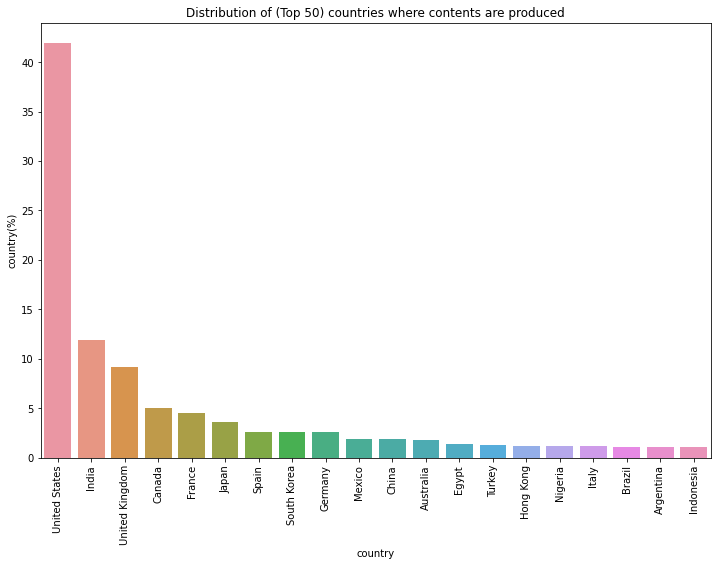

In [185]:
a =dfM.groupby(['country'],as_index=False)['show_id'].nunique()

a.sort_values(by=['show_id','country'],ascending=False,inplace=True)
a.rename(columns  = {'show_id':'count'},inplace=True)
a.replace({'nan':np.nan},inplace=True)
a.dropna(axis=0,inplace=True)
a['perc'] = round((a['count']/df.shape[0])*100,2)


plt.figure(figsize = (12,8))
ax = sns.barplot(x = 'country', y = 'perc',data = a.iloc[0:20,])

plt.xticks(rotation=90)
ax.set(title = 'Distribution of (Top 50) countries where contents are produced')
ax.set(ylabel = 'country(%)')
ax.set(xlabel = 'country')
plt.show()

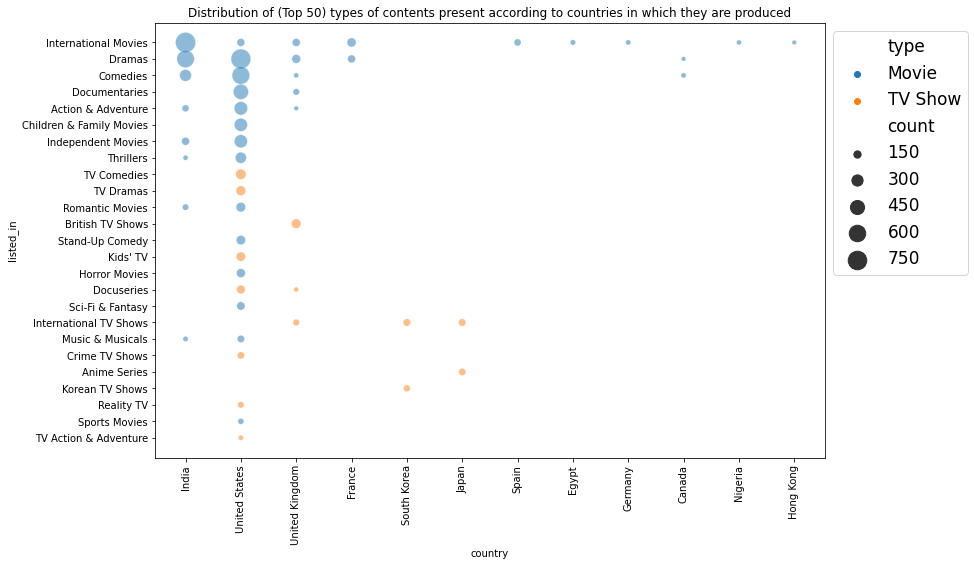

In [186]:
a =dfM.groupby(['country','listed_in','type'],as_index=False)['show_id'].nunique()

a.sort_values(by=['show_id','country'],ascending=False,inplace=True)
a.rename(columns  = {'show_id':'count'},inplace=True)
a.replace({'nan':np.nan},inplace=True)
a.dropna(axis=0,inplace=True)

plt.figure(figsize =(12,8))
ax = sns.scatterplot(data=a.iloc[0:50,], x="country", y="listed_in", hue='type', size="count",alpha=0.5, sizes=(20, 400))
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=17)
ax.set(title = 'Distribution of (Top 50) types of contents present according to countries in which they are produced')
plt.xticks(rotation=90)

plt.show()

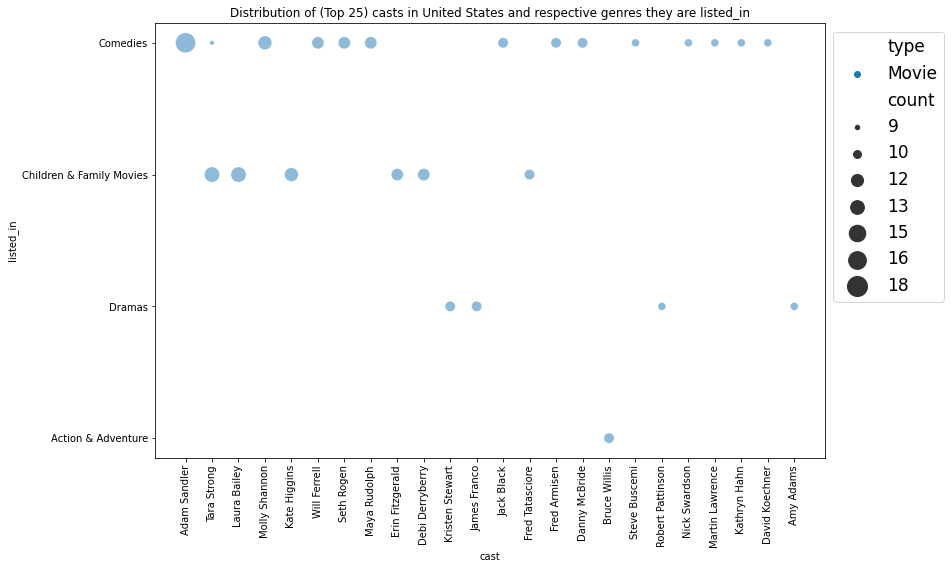

In [187]:
a =dfM[dfM['country']=='United States'].groupby(['cast','listed_in','type'],as_index=False)['show_id'].nunique()

a.sort_values(by=['show_id','cast'],ascending=False,inplace=True)
a.rename(columns  = {'show_id':'count'},inplace=True)
a.replace({'nan':np.nan},inplace=True)
a.dropna(axis=0,inplace=True)

plt.figure(figsize =(12,8))
ax = sns.scatterplot(data=a.iloc[0:25,], x="cast", y="listed_in", hue='type', size="count",alpha=0.5, sizes=(20, 400))
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=17)
plt.xticks(rotation=90)

ax.set(title = 'Distribution of (Top 25) casts in United States and respective genres they are listed_in')


plt.show()

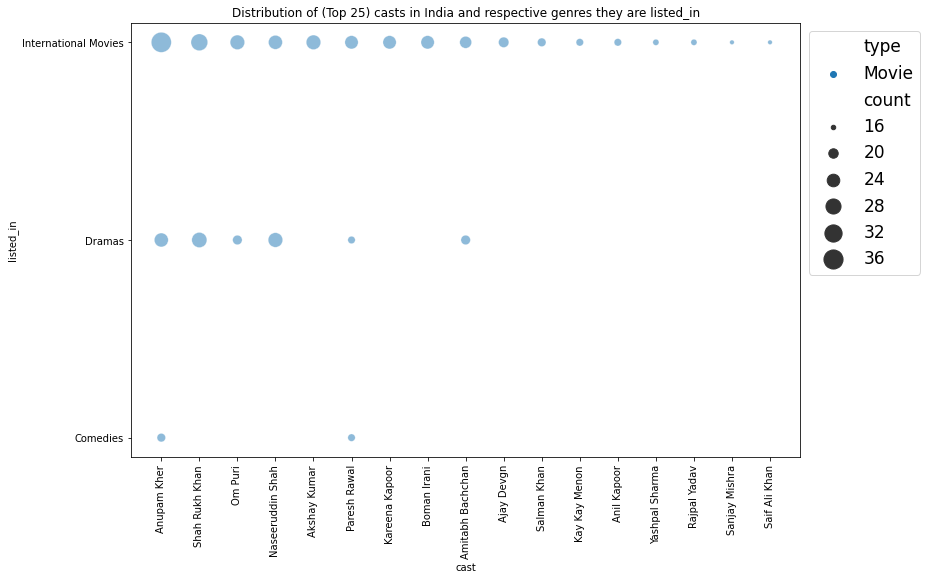

In [188]:
a =dfM[dfM['country']=='India'].groupby(['cast','listed_in','type'],as_index=False)['show_id'].nunique()

a.sort_values(by=['show_id','cast'],ascending=False,inplace=True)
a.rename(columns  = {'show_id':'count'},inplace=True)

a.replace({'nan':np.nan},inplace=True)
a.dropna(axis=0,inplace=True)


plt.figure(figsize =(12,8))
ax = sns.scatterplot(data=a.iloc[0:25,], x="cast", y="listed_in", hue='type', size="count",alpha=0.5, sizes=(20, 400))
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=17)
plt.xticks(rotation=90)
ax.set(title = 'Distribution of (Top 25) casts in India and respective genres they are listed_in')

plt.show()

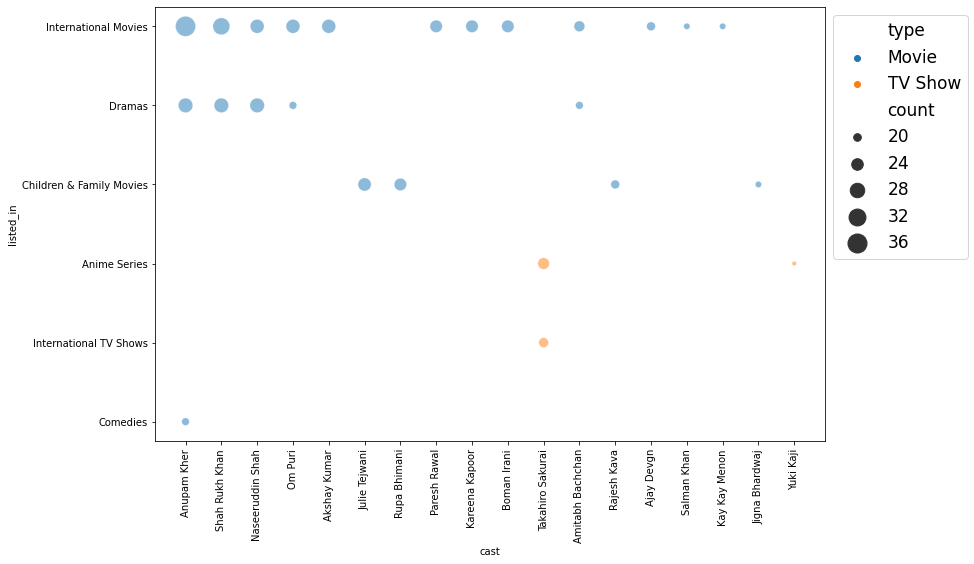

In [189]:
a =dfM.groupby(['cast','listed_in','type'],as_index=False)['show_id'].nunique()

a.sort_values(by=['show_id','cast'],ascending=False,inplace=True)
a.rename(columns  = {'show_id':'count'},inplace=True)
a.replace({'nan':np.nan},inplace=True)
a.dropna(axis=0,inplace=True)


plt.figure(figsize =(12,8))
sns.scatterplot(data=a.iloc[0:25,], x="cast", y="listed_in", hue='type', size="count",alpha=0.5, sizes=(20, 400))
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=17)
plt.xticks(rotation=90)
ax.set(title = 'Distribution of (Top 25) casts in India and respective genres they are listed_in')

plt.show()

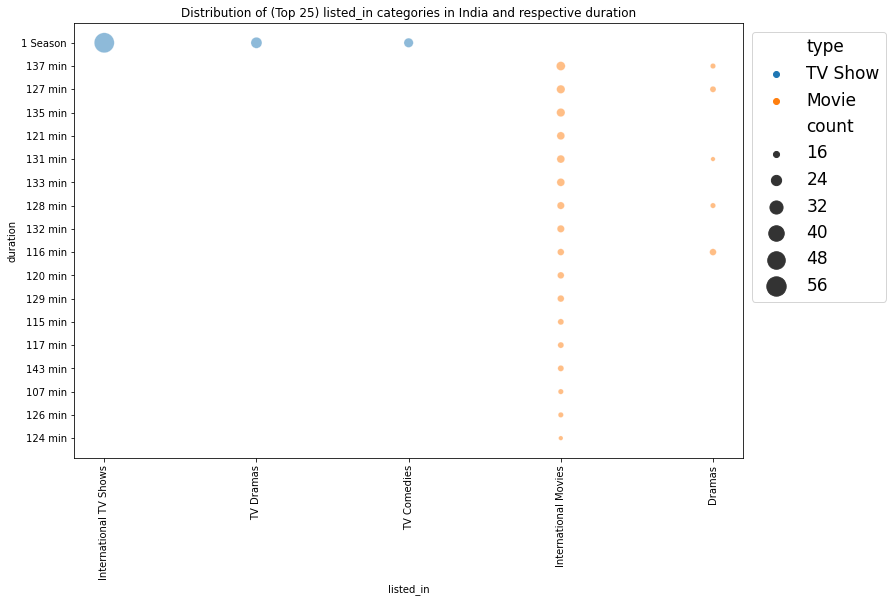

In [190]:
a =dfM[dfM['country']=='India'].groupby(['listed_in','duration','type'],as_index=False)['show_id'].nunique()

a.sort_values(by=['show_id','listed_in'],ascending=False,inplace=True)
a.rename(columns  = {'show_id':'count'},inplace=True)
a.replace({'nan':np.nan},inplace=True)
a.dropna(axis=0,inplace=True)



plt.figure(figsize =(12,8))
ax = sns.scatterplot(data=a.iloc[0:25,], x="listed_in", y="duration", hue='type', size="count",alpha=0.5, sizes=(20, 400))
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=17)
ax.set(title = 'Distribution of (Top 25) listed_in categories in India and respective duration')
plt.xticks(rotation=90)

plt.show()


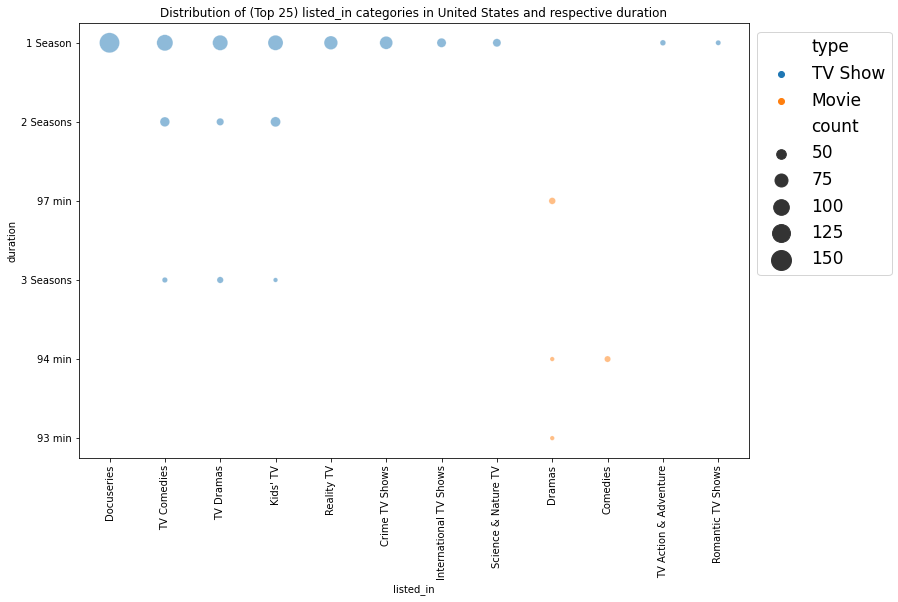

In [191]:
a =dfM[dfM['country']=='United States'].groupby(['listed_in','duration','type'],as_index=False)['show_id'].nunique()

a.sort_values(by=['show_id','listed_in'],ascending=False,inplace=True)
a.rename(columns  = {'show_id':'count'},inplace=True)
a.replace({'nan':np.nan},inplace=True)
a.dropna(axis=0,inplace=True)


plt.figure(figsize =(12,8))
ax = sns.scatterplot(data=a.iloc[0:20,], x="listed_in", y="duration", hue='type', size="count",alpha=0.5, sizes=(20, 400))
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=17)
ax.set(title = 'Distribution of (Top 25) listed_in categories in United States and respective duration')
plt.xticks(rotation=90)

plt.show()

# lets analysis year-on-year change in #movies vs added_year vs release_year

In [192]:
df['date_added']  = pd.to_datetime(df['date_added'])

In [193]:
df['date_added_year']=df['date_added'].dt.year

<AxesSubplot:xlabel='count', ylabel='release_year'>

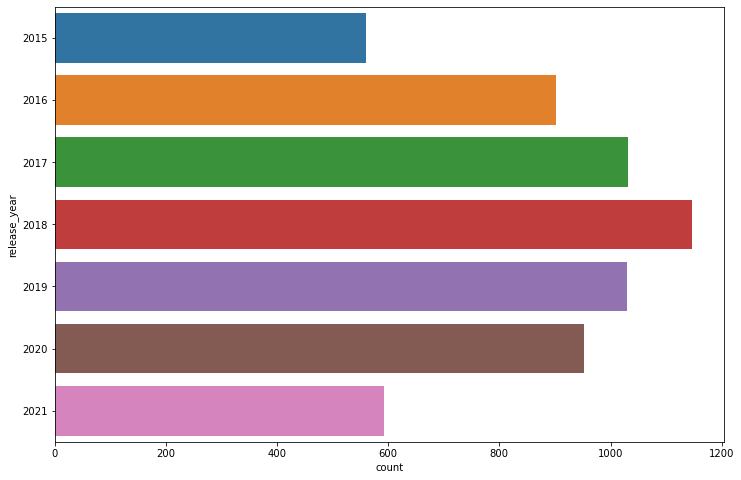

In [194]:
plt.figure(figsize=(12,8))
sns.countplot(y = 'release_year',data = df.loc[df['release_year'].isin(list([2015, 2016, 2017, 2018, 2019,2020,2021]))])

In [195]:
df['interval_release_added_yr'] = df['date_added_year'] - df['release_year']


[Text(0.5, 1.0, "Distribution of time interval between contents' release date and added to Netflix date")]

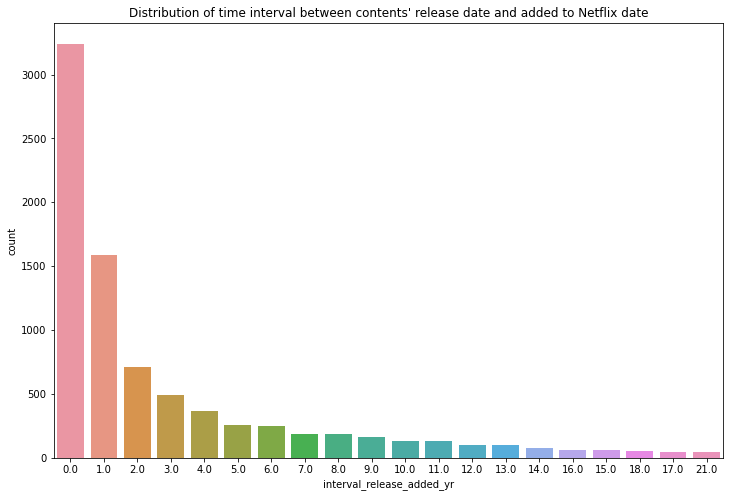

In [196]:
plt.figure(figsize=(12,8))
ax = sns.countplot(x = df['interval_release_added_yr'],data =df ,order = df['interval_release_added_yr'].value_counts().nlargest(n=20).index)
ax.set(title = "Distribution of time interval between contents' release date and added to Netflix date" )


### we can conclude that shows are being added same year as their release year (~37% time). 

In [197]:
df['interval_release_added_yr'] = df['date_added_year'] - df['release_year']
a = pd.DataFrame(round(df['interval_release_added_yr'].value_counts()/len(df),2)*100)
a.head(10)

,interval_release_added_yr
0.0,37.0
1.0,18.0
2.0,8.0
3.0,6.0
4.0,4.0
5.0,3.0
6.0,3.0
7.0,2.0
8.0,2.0
9.0,2.0


<AxesSubplot:xlabel='count', ylabel='date_added_year'>

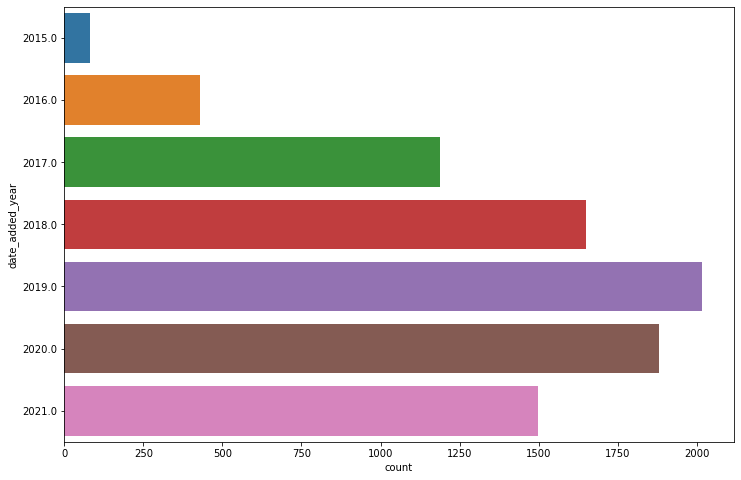

In [198]:
plt.figure(figsize=(12,8))
sns.countplot(y = 'date_added_year',data = df.loc[df['date_added_year'].isin(list([2015, 2016, 2017, 2018, 2019,2020, 2021]))])


In [199]:
a = pd.DataFrame(round(df['date_added_year'].value_counts()/len(df),2)*100)
a.head(10)

a.sort_index(ascending=False,inplace=True)

data = a.iloc[0:7,]
data.reset_index(inplace=True)

data.rename(columns = {'index':'date_added_year','date_added_year':'perc'},inplace=True)
data['yoy_change'] = 0

for i in range(data.shape[0]-1):
    data['yoy_change'][i] = round(((data['perc'][i] - data['perc'][i+1])/data['perc'][i+1])*100,2)
    
data

,date_added_year,perc,yoy_change
0,2021.0,17.0,-19
1,2020.0,21.0,-8
2,2019.0,23.0,21
3,2018.0,19.0,46
4,2017.0,13.0,160
5,2016.0,5.0,400
6,2015.0,1.0,0


In [200]:
b = pd.DataFrame(round(df['release_year'].value_counts()/len(df),2)*100)
b.sort_index(ascending=False,inplace=True)
bdata = b.iloc[0:7,]
bdata.reset_index(inplace=True)
bdata.rename(columns = {'index':'release_year','release_year':'perc'},inplace=True)
bdata['yoy_change%']=0
for i in range(bdata.shape[0]-1):
    bdata['yoy_change%'][i] = round(((bdata['perc'][i] - bdata['perc'][i+1])/bdata['perc'][i+1])*100,2)
bdata

,release_year,perc,yoy_change%
0,2021,7.0,-36
1,2020,11.0,-8
2,2019,12.0,-7
3,2018,13.0,8
4,2017,12.0,20
5,2016,10.0,66
6,2015,6.0,0


In [201]:
a = df.groupby(['date_added_year'],as_index= False)['show_id'].count()
a.sort_values(by = 'date_added_year',ascending=False,inplace=True)
a.rename(columns = {'show_id':'count'},inplace=True)

a.reset_index(drop=True,inplace=True)

a['yoy_change%'] = 0
for i in range(a.shape[0]-1):
    a['yoy_change%'][i] = round(((a['count'][i] - a['count'][i+1])/a['count'][i+1])*100,2)
a = a.iloc[0:30,]
a

,date_added_year,count,yoy_change%
0,2021.0,1498,-20
1,2020.0,1879,-6
2,2019.0,2016,22
3,2018.0,1649,38
4,2017.0,1188,176
5,2016.0,429,423
6,2015.0,82,241
7,2014.0,24,118
8,2013.0,11,266
9,2012.0,3,-76


In [202]:
b = df.groupby(['release_year'],as_index= False)['show_id'].count()
b.sort_values(by = 'release_year',ascending=False,inplace=True)
b.rename(columns = {'show_id':'count'},inplace=True)

b.reset_index(drop=True,inplace=True)

b['yoy_change%'] = 0
for i in range(b.shape[0]-1):
    b['yoy_change%'][i] = round(((b['count'][i] - b['count'][i+1])/b['count'][i+1])*100,2)
b = b.iloc[0:20,]
b

,release_year,count,yoy_change%
0,2021,592,-37
1,2020,953,-7
2,2019,1030,-10
3,2018,1147,11
4,2017,1032,14
5,2016,902,61
6,2015,560,59
7,2014,352,22
8,2013,288,21
9,2012,237,28


[Text(0.5, 0, 'release_year'),
 Text(0.5, 1.0, 'Distribution of movie/show being released over past 20 years')]

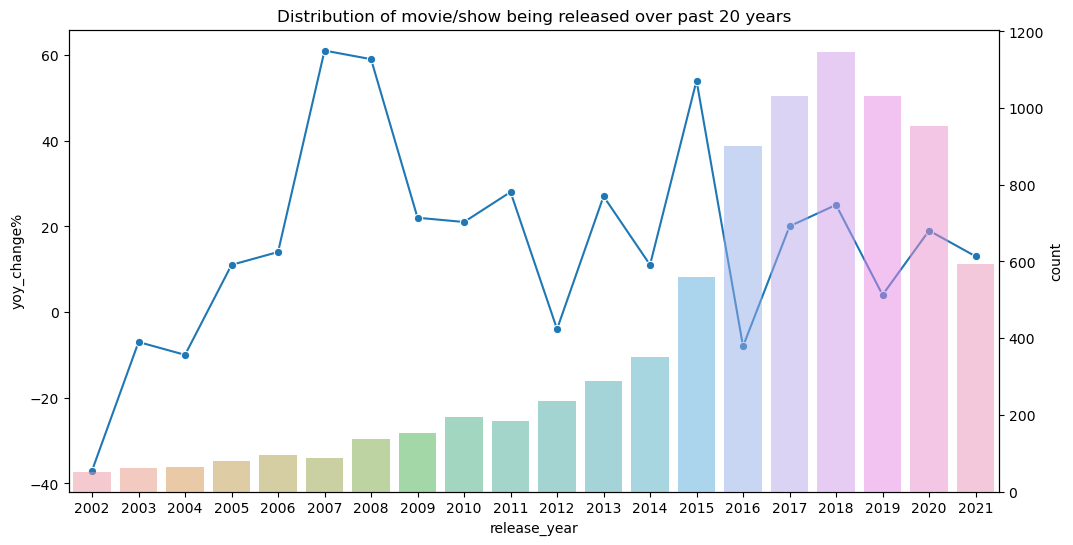

In [203]:
#https://stackoverflow.com/questions/37930693/how-can-i-make-a-barplot-and-a-lineplot-in-the-same-seaborn-plot-with-different

matplotlib.rc_file_defaults()
ax1 = sns.set_style(style=None, rc=None )

fig, ax1 = plt.subplots(figsize=(12,6))

sns.lineplot(data = b['yoy_change%'], marker='o', sort = False, ax=ax1)
ax2 = ax1.twinx()

sns.barplot(data = b, x='release_year', y='count', alpha=0.5, ax=ax2)

ax1.set(xlabel = 'release_year', title = 'Distribution of movie/show being released over past 20 years')


[Text(0.5, 0, 'date_added_year'),
 Text(0.5, 1.0, 'Distribution of movie/show being added to Netflix over past 13 years')]

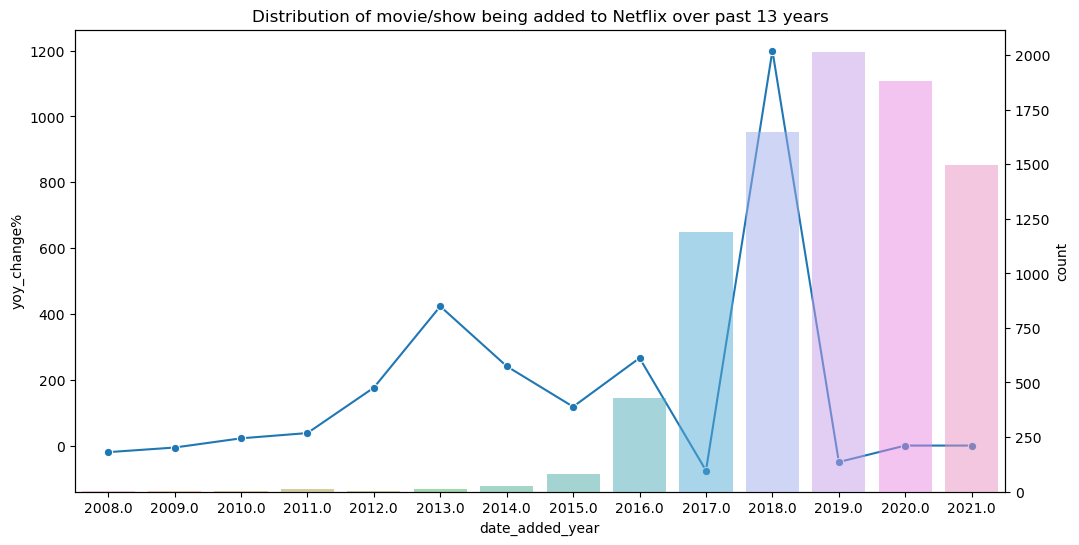

In [204]:

matplotlib.rc_file_defaults()
ax1 = sns.set_style(style=None, rc=None )

fig, ax1 = plt.subplots(figsize=(12,6))

sns.lineplot(data = a['yoy_change%'], marker='o', sort = False, ax=ax1)
ax2 = ax1.twinx()

sns.barplot(data = a, x='date_added_year', y='count', alpha=0.5, ax=ax2)
ax1.set(xlabel = 'date_added_year', title = 'Distribution of movie/show being added to Netflix over past 13 years')

In [205]:
df['date_added_month'] = df['date_added'].dt.month_name()

[Text(0.5, 0, 'count'),
 Text(0.5, 1.0, 'Monthwise count of contents being added to Netflix')]

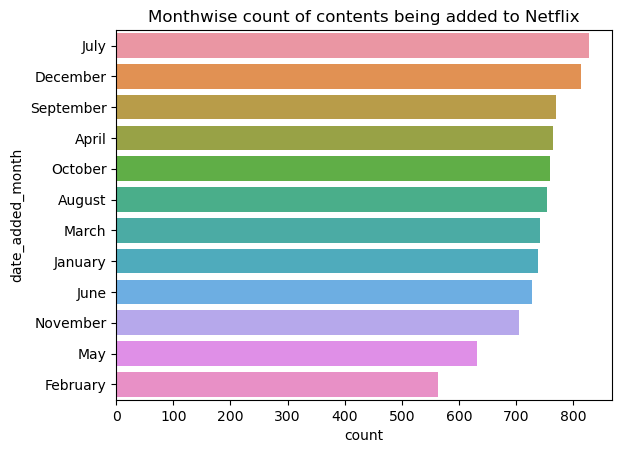

In [206]:
ax = sns.countplot(y = 'date_added_month',data = df, order = df['date_added_month'].value_counts(ascending=False).index)

ax.set(xlabel = 'count', title = 'Monthwise count of contents being added to Netflix')


[Text(0.5, 0, 'Year'),
 Text(0.5, 1.0, 'Difference between release & added year over past 5 years')]

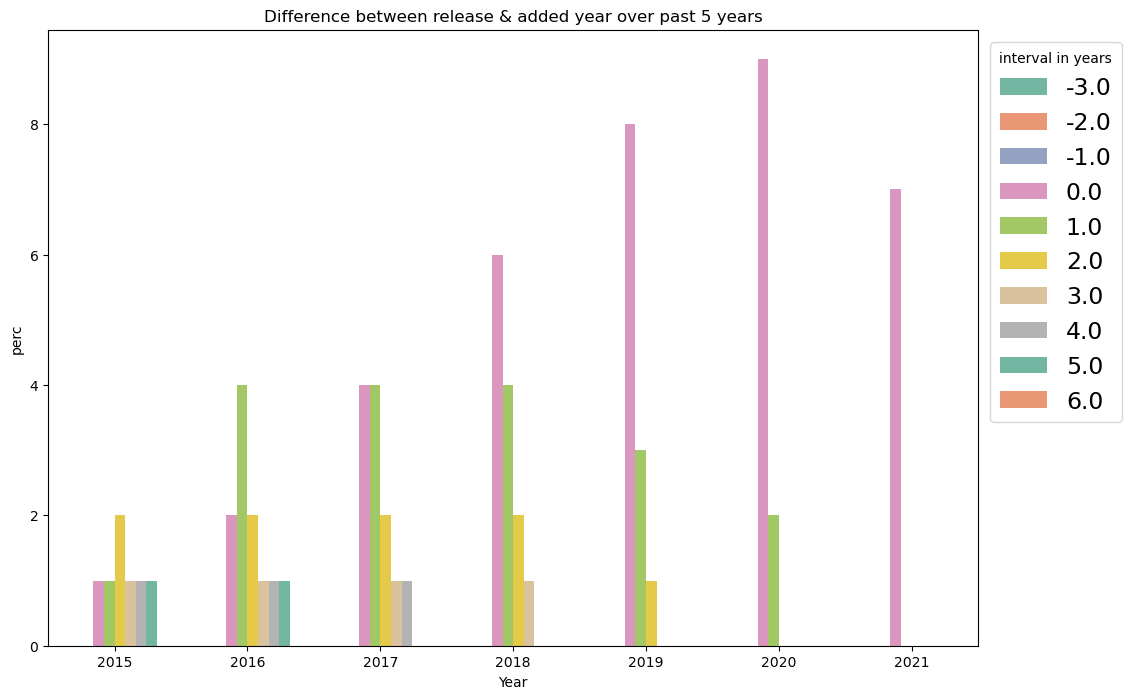

In [207]:
a =df.groupby(['release_year', 'interval_release_added_yr'],as_index=False)['show_id'].nunique()

a.sort_values(by=['release_year','interval_release_added_yr', 'show_id'], ascending=False,inplace=True)

a.replace({'nan':np.nan},inplace=True)
a.dropna(axis=0,inplace=True)
a['perc'] = round((a['show_id']/8807),2)*100

plt.figure(figsize = (12,8))

ax = sns.barplot(data = a.loc[a['release_year'].isin(list([2015, 2016, 2017, 2018, 2019, 2020,2021]))], 
            x= 'release_year', y= 'perc', hue = 'interval_release_added_yr', palette = "Set2")
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=17, title = 'interval in years')
ax.set(xlabel = 'Year', title = 'Difference between release & added year over past 5 years')